In [85]:
import pandas as pd


In [86]:
pip install pandas

# ML

In [87]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df_final_clean = pd.read_excel("df_final_clean.xlsx")
df_final_clean_encoded = df_final_clean.copy()

# ‚úÖ 3. ‡πÅ‡∏õ‡∏•‡∏á categorical ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ)
for col in df_final_clean_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_final_clean_encoded[col] = le.fit_transform(df_final_clean_encoded[col]).astype(int)

df_final_clean_encoded = df_final_clean_encoded.drop(columns=['date'])
df_final_clean_encoded

cases  temp_15d_avg  rain_15d_avg  humid_15d_avg  ‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)  ‡πÄ‡∏û‡∏®  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  \
0         1     22.745000      0.000000      74.794444      34.0    0      0   
1         1     27.170000      2.386667      74.827333      13.0    0     10   
2         1     27.786667      2.520000      73.410667      51.0    1      0   
3         1     27.970000      4.253333      73.302667      14.0    1     10   
4         2     28.501333      4.233333      73.984667      58.0    0      9   
...     ...           ...           ...            ...       ...  ...    ...   
1045      2     22.858571      2.071429      82.036429      20.5    1      6   
1046      2     22.716667      1.933333      81.784000      56.0    0      7   
1047      1     21.687333      1.933333      82.676000      11.0    1     10   
1048      1     21.304667      1.933333      82.992667      41.0    1      7   
1049      1     21.056000      1.933333      82.984667      31.0    1      7   

      ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  ‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•  
0        8      1      2  2017       1       2  
1       60      8      4  2017       2       1  
2       60      8      5  2017       2       1  
3       60      8      5  2017       2       1  
4       60      8      5  2017       2       1  
...    ...    ...    ...   ...     ...     ...  
1045     3      2     12  2024       4       2  
1046    31      2     12  2024       4       2  
1047    15      2     12  2024       4       2  
1048    35      6     12  2024       4       2  
1049    15      2     12  2024       4       2  

[1050 rows x 13 columns]

In [91]:
df_final_clean_encoded.corr()['cases']

cases            1.000000
temp_15d_avg     0.100030
rain_15d_avg     0.094145
humid_15d_avg    0.018460
‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)        -0.034136
‡πÄ‡∏û‡∏®              0.007874
‡∏≠‡∏≤‡∏ä‡∏µ‡∏û            0.088724
‡∏ï‡∏≥‡∏ö‡∏•             0.051749
‡∏≠‡∏≥‡πÄ‡∏†‡∏≠            0.042857
‡πÄ‡∏î‡∏∑‡∏≠‡∏ô           -0.005328
‡∏õ‡∏µ               0.229528
‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™           0.013666
‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•          -0.147233
Name: cases, dtype: float64

In [95]:
pip install seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


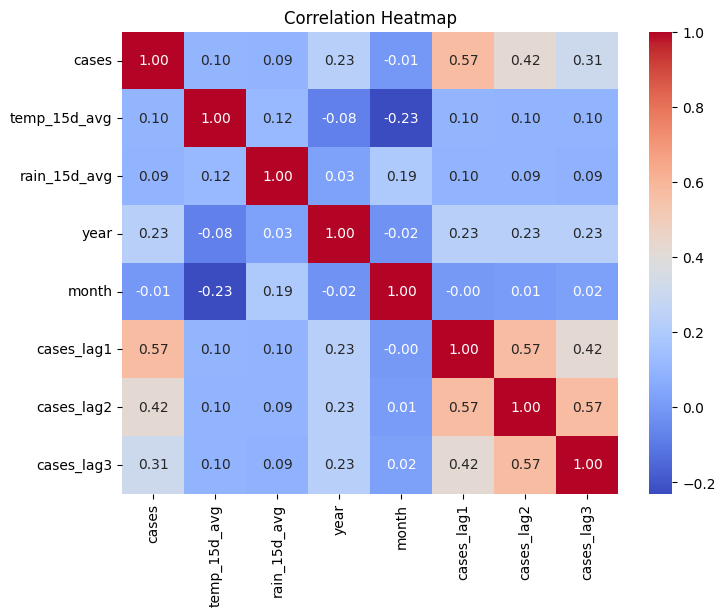

üìä Model Performance:
RMSE: 2.54, MAE: 1.70, R¬≤: 0.393
‚úÖ Model trained & saved with correlation check + categorical encoding + lag features


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- Load Data -------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# ------------------- Generate Lag Features -------------------
df = df.sort_values("date").reset_index(drop=True)
for k in [1, 2, 3]:
    df[f"cases_lag{k}"] = df["cases"].shift(k)

df = df.dropna().reset_index(drop=True)

# ------------------- Correlation (EDA) -------------------
corr = df[["cases", "temp_15d_avg", "rain_15d_avg", 
           "year", "month", "cases_lag1", "cases_lag2", "cases_lag3"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ------------------- Features -------------------
features = [
    "temp_15d_avg", "rain_15d_avg",
    "year", "month",
    "cases_lag1", "cases_lag2", "cases_lag3",
    "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"
]

X = df[features]
y = df["cases"]

# ------------------- One-hot encode categorical -------------------
cat_cols = ["‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = enc.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=enc.get_feature_names_out(cat_cols))

X_num = X.drop(columns=cat_cols).reset_index(drop=True)
X_final = pd.concat([X_num, X_cat_df], axis=1)

# ------------------- Train/Test split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# ------------------- Train XGBoost -------------------
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)

# ------------------- Evaluate -------------------
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("üìä Model Performance:")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.3f}")

# ------------------- Save model + features + encoder -------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(list(X_final.columns), "xgb_features.pkl")
joblib.dump(enc, "xgb_encoder.pkl")

print("‚úÖ Model trained & saved with correlation check + categorical encoding + lag features")


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import joblib
import numpy as np

# ---------------- Load Data ----------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# ---------------- Generate Lag Features ----------------
df = df.sort_values("date").reset_index(drop=True)
for k in [1, 2, 3]:
    df[f"cases_lag{k}"] = df["cases"].shift(k)

df = df.dropna().reset_index(drop=True)

# ---------------- Features ----------------
features = [
    "temp_15d_avg", "rain_15d_avg",
    "year", "month",
    "cases_lag1", "cases_lag2", "cases_lag3",
    "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"
]

X = df[features]
y = df["cases"]

# ---------------- One-hot Encode ----------------
cat_cols = ["‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = enc.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=enc.get_feature_names_out(cat_cols))

X_num = X.drop(columns=cat_cols).reset_index(drop=True)
X_final = pd.concat([X_num, X_cat_df], axis=1)

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# ======================= Train Models =======================
# 1. XGBoost
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=10, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Deep Learning (MLPRegressor)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), activation="relu",
    solver="adam", max_iter=500, random_state=42
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# ======================= Evaluate =======================
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìä {name} Performance:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.3f}")
    return rmse, mae, r2

eval_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb)
eval_rf = evaluate_model("Random Forest", y_test, y_pred_rf)
eval_mlp = evaluate_model("Deep Learning (MLP)", y_test, y_pred_mlp)

# ======================= Save Models =======================
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(rf_model, "rf_regressor.pkl")
joblib.dump(mlp_model, "mlp_regressor.pkl")
joblib.dump(list(X_final.columns), "xgb_features.pkl")
joblib.dump(enc, "xgb_encoder.pkl")

print("\n‚úÖ All models trained & saved successfully!")



üìä XGBoost Performance:
RMSE: 2.54, MAE: 1.70, R¬≤: 0.393

üìä Random Forest Performance:
RMSE: 2.52, MAE: 1.70, R¬≤: 0.402

üìä Deep Learning (MLP) Performance:
RMSE: 2.70, MAE: 1.67, R¬≤: 0.313

‚úÖ All models trained & saved successfully!


In [4]:
X_final

temp_15d_avg  rain_15d_avg  year  month  cases_lag1  cases_lag2  \
0        27.970000      4.253333  2017      5         1.0         1.0   
1        28.501333      4.233333  2017      5         1.0         1.0   
2        28.355333      4.253333  2017      5         2.0         1.0   
3        28.310000      2.100000  2017      5         1.0         2.0   
4        27.778000     15.313333  2017      5         1.0         1.0   
...            ...           ...   ...    ...         ...         ...   
1042     22.858571      2.071429  2024     12         1.0         1.0   
1043     22.716667      1.933333  2024     12         2.0         1.0   
1044     21.687333      1.933333  2024     12         2.0         2.0   
1045     21.304667      1.933333  2024     12         1.0         2.0   
1046     21.056000      1.933333  2024     12         1.0         1.0   

      cases_lag3  ‡∏ï‡∏≥‡∏ö‡∏•_‡∏Ç‡∏∏‡∏ô‡∏Ñ‡∏ß‡∏£  ‡∏ï‡∏≥‡∏ö‡∏•_‡∏Ñ‡∏ß‡∏£  ‡∏ï‡∏≥‡∏ö‡∏•_‡∏Ñ‡∏∑‡∏≠‡πÄ‡∏ß‡∏µ‡∏¢‡∏á  ...  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡∏ó‡∏´‡∏≤‡∏£,‡∏ï‡∏≥‡∏£‡∏ß‡∏à  \
0            1.0          0.0       0.0            0.0  ...               0.0   
1            1.0          0.0       0.0            0.0  ...               0.0   
2            1.0          0.0       0.0            0.0  ...               0.0   
3            1.0          0.0       0.0            0.0  ...               0.0   
4            2.0          0.0       0.0            0.0  ...               0.0   
...          ...          ...       ...            ...  ...               ...   
1042         1.0          0.0       0.0            0.0  ...               0.0   
1043         1.0          0.0       0.0            0.0  ...               0.0   
1044         1.0          0.0       0.0            0.0  ...               0.0   
1045         2.0          0.0       0.0            0.0  ...               0.0   
1046         2.0          0.0       0.0            0.0  ...               0.0   

      ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡∏ô‡∏±‡∏Å‡∏ö‡∏ß‡∏ä  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡∏ô‡∏±‡∏Å‡πÄ‡∏£‡∏µ‡∏¢‡∏ô  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡∏£‡∏±‡∏ö‡∏à‡πâ‡∏≤‡∏á,‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏£  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡∏≠‡∏∑‡πà‡∏ô‡πÜ  \
0              0.0             0.0                   0.0          0.0   
1              0.0             0.0                   0.0          0.0   
2              0.0             0.0                   0.0          0.0   
3              0.0             1.0                   0.0          0.0   
4              0.0             0.0                   0.0          0.0   
...            ...             ...                   ...          ...   
1042           0.0             1.0                   0.0          0.0   
1043           0.0             0.0                   1.0          0.0   
1044           0.0             0.0                   0.0          0.0   
1045           0.0             0.0                   1.0          0.0   
1046           0.0             0.0                   1.0          0.0   

      ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡πÄ‡∏Å‡∏©‡∏ï‡∏£  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û_‡πÑ‡∏°‡πà‡∏ó‡∏£‡∏≤‡∏ö‡∏≠‡∏≤‡∏ä‡∏µ‡∏û/‡πÉ‡∏ô‡∏õ‡∏Å‡∏Ñ‡∏£‡∏≠‡∏á  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•_Rainy  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•_Summer  \
0             0.0                          1.0           0.0            1.0   
1             1.0                          0.0           0.0            1.0   
2             1.0                          0.0           0.0            1.0   
3             0.0                          0.0           0.0            1.0   
4             0.0                          1.0           1.0            0.0   
...           ...                          ...           ...            ...   
1042          0.0                          0.0           0.0            0.0   
1043          0.0                          0.0           0.0            0.0   
1044          0.0                          1.0           0.0            0.0   
1045          0.0                          0.0           0.0            0.0   
1046          0.0                          0.0           0.0            0.0   

      ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•_Winter  
0           

‡∏≠‡∏±‡∏ô‡πÄ‡∏Å‡πà‡∏≤

In [10]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


‚úÖ XGBoost RMSE: 0.08
‚úÖ XGBoost R¬≤: 0.999
‚úÖ XGBoost MAE: 0.01


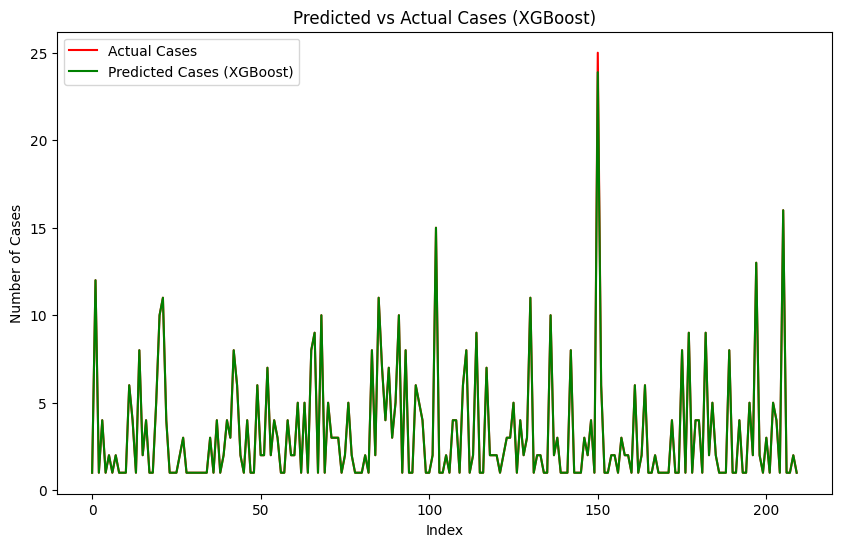

In [90]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ‚úÖ 4. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ‚úÖ 5. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ 6. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# ‚úÖ 7. ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
xgb_model.fit(X_train, y_train)

# ‚úÖ 8. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏•
y_pred = xgb_model.predict(X_test)

# ‚úÖ 9. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì MAE

print(f"‚úÖ XGBoost RMSE: {rmse:.2f}")
print(f"‚úÖ XGBoost R¬≤: {r2:.3f}")
print(f"‚úÖ XGBoost MAE: {mae:.2f}")  # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏• MAE

# ‚úÖ 10. ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡πà‡∏≤‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ vs ‡∏Ñ‡πà‡∏≤‡∏à‡∏£‡∏¥‡∏á
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Cases', color='red')
plt.plot(y_pred, label='Predicted Cases (XGBoost)', color='green')
plt.title('Predicted vs Actual Cases (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [ ]:
import joblib
joblib.dump(xgb_model, "xgb_regressor.pkl")
print("‚úÖ Saved new model: xgb_regressor.pkl")


‚úÖ Saved new model: xgb_regressor.pkl


‡∏ó‡∏≥‡πÉ‡∏´‡∏°‡πà‡πÄ‡∏ó‡∏£‡∏ô


üîπ XGBoost RMSE: 3.12, R¬≤: 0.167, MAE: 2.33
üìä XGBoost CV R¬≤ mean: -0.097, std: 0.211
üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


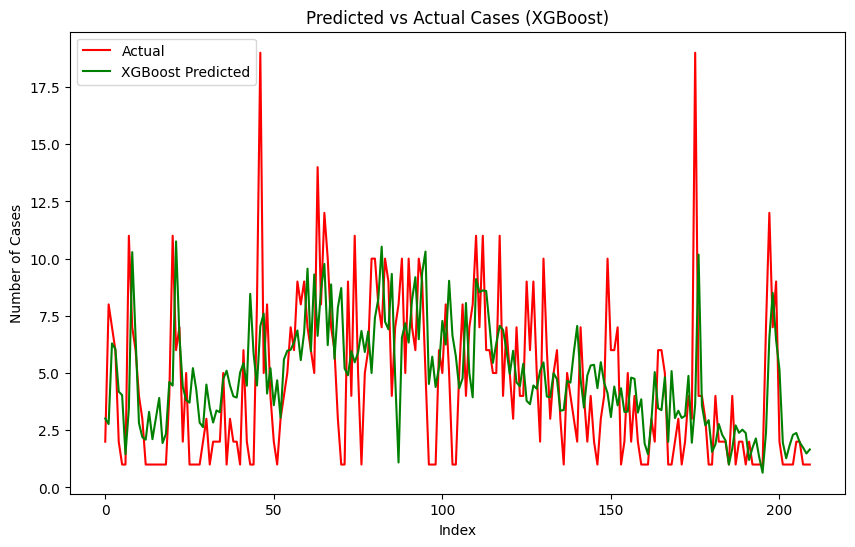

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• + lag features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X = df_with_lag.drop(columns=["cases", "‡πÄ‡∏û‡∏®", "‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)", "‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™", "humid_15d_avg"])
y = df_with_lag["cases"]

# -------------------------------
# 2) Train/Test Split (Time Series)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------------
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {"Model": name, "RMSE": rmse, "R2": r2, "MAE": mae}, y_pred

# -------------------------------
# 3) Train + Evaluate XGBoost
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)

xgb_result, xgb_pred = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# Cross-validation (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(xgb_model, X, y, cv=tscv, scoring="r2")
print(f"üìä XGBoost CV R¬≤ mean: {cv_scores.mean():.3f}, std: {cv_scores.std():.3f}")

# -------------------------------
# 4) Save XGBoost Model + Features
# -------------------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(X.columns.tolist(), "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")

# -------------------------------
# 5) Visualization
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(xgb_pred, label="XGBoost Predicted", color="green")
plt.title("Predicted vs Actual Cases (XGBoost)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


üîπ XGBoost RMSE: 3.12, R¬≤: 0.167, MAE: 2.33
üîπ RandomForest RMSE: 2.97, R¬≤: 0.245, MAE: 2.24
üîπ Deep Learning RMSE: 3.06, R¬≤: 0.198, MAE: 2.32

üìä Performance Comparison:
           Model      RMSE        R2       MAE
0        XGBoost  3.116279  0.167044  2.330670
1   RandomForest  2.966994  0.244937  2.243819
2  Deep Learning  3.057424  0.198209  2.320110


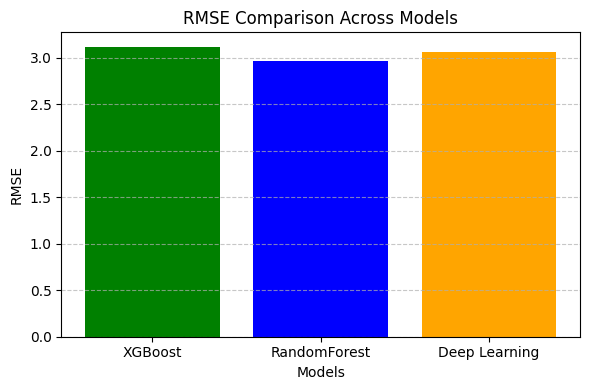

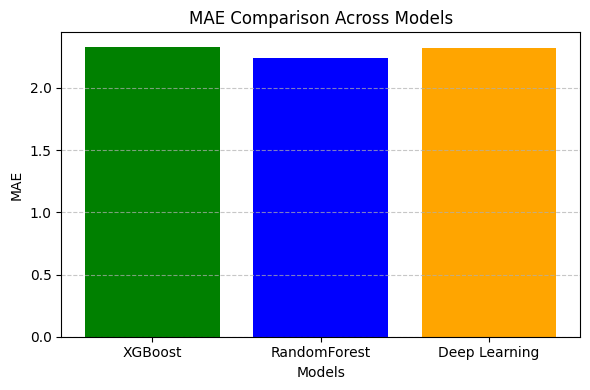

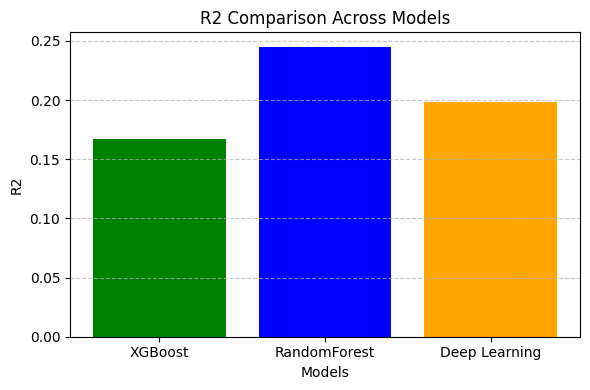

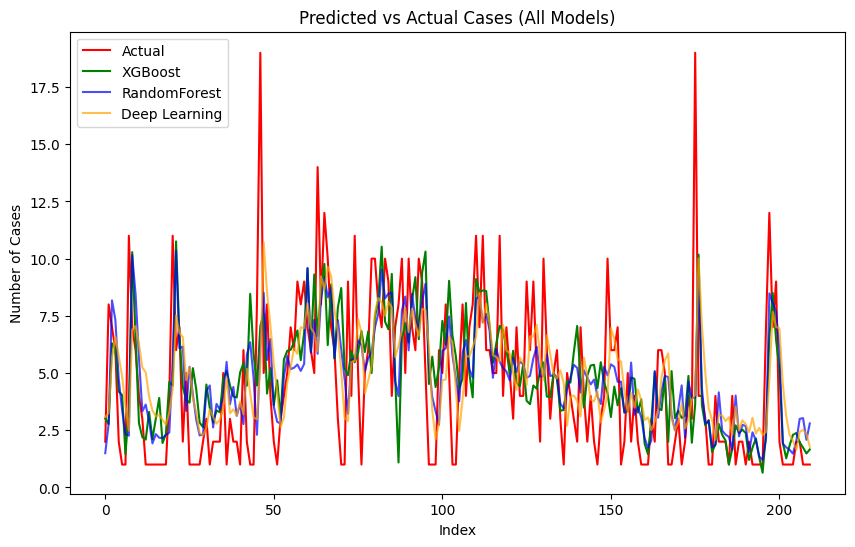

In [50]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• + lag features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X = df_with_lag.drop(columns=["cases","‡πÄ‡∏û‡∏®","‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)","‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™","humid_15d_avg"])
y = df_with_lag["cases"]

# -------------------------------
# 2) Train/Test Split (time series)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }, y_pred

# -------------------------------
# 3) Train + Evaluate Models
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)
xgb_result, xgb_pred = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf_result, rf_pred = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)
mlp_result, mlp_pred = evaluate_model("Deep Learning", mlp_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 4) ‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á
# -------------------------------
results_df = pd.DataFrame([xgb_result, rf_result, mlp_result])
print("\nüìä Performance Comparison:")
print(results_df)

# -------------------------------
# 5) ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö (Metric)
# -------------------------------
metrics = ["RMSE", "MAE", "R2"]
for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df["Model"], results_df[metric], color=["green","blue","orange"])
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6) ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü Predicted vs Actual
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(xgb_pred, label="XGBoost", color="green")
plt.plot(rf_pred, label="RandomForest", color="blue", alpha=0.7)
plt.plot(mlp_pred, label="Deep Learning", color="orange", alpha=0.7)
plt.title("Predicted vs Actual Cases (All Models)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ß‡πà‡∏≤‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡πÄ‡∏•‡∏Å‡πÄ‡πÄ‡∏•‡∏∞‡πÑ‡∏°‡πà‡∏°‡∏µ

üîπ XGBoost (No Lag) RMSE: 3.31, R¬≤: 0.060, MAE: 2.40
üîπ XGBoost (Lag Features) RMSE: 3.12, R¬≤: 0.167, MAE: 2.33

üìä Performance Comparison:
                    Model      RMSE        R2       MAE
0        XGBoost (No Lag)  3.311099  0.059641  2.395751
1  XGBoost (Lag Features)  3.116279  0.167044  2.330670


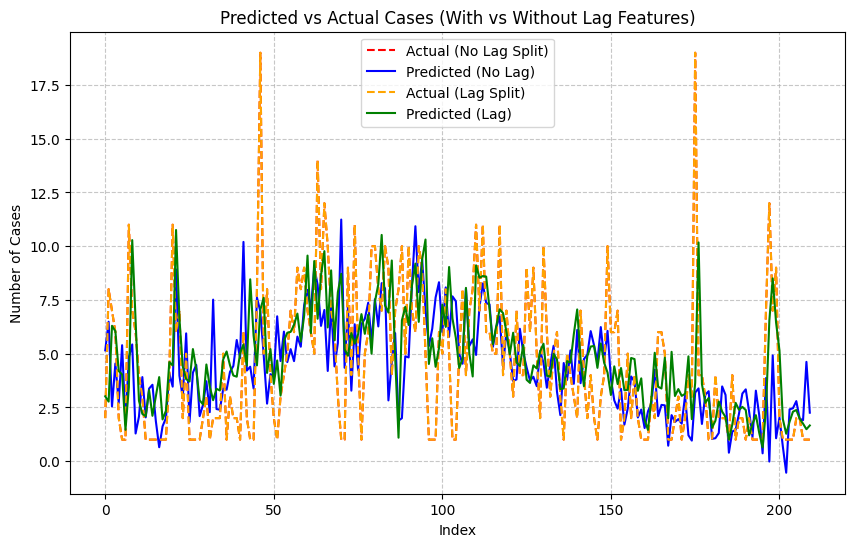

üíæ Saved: xgb_regressor.pkl + xgb_features.pkl (Lag Version)


In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# -------------------------------
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }, y_pred

# -------------------------------
# 1) Dataset ‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏°‡∏µ Lag Features
# -------------------------------
X_no_lag = df_final_clean_encoded.drop(columns=["cases","‡πÄ‡∏û‡∏®","‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)","‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™","humid_15d_avg"])
y_no_lag = df_final_clean["cases"]

X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_no_lag, y_no_lag, test_size=0.2, shuffle=False, random_state=42
)

xgb_no_lag = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)

res_no_lag, y_pred_nl = evaluate_model("XGBoost (No Lag)", xgb_no_lag,
                                       X_train_nl, X_test_nl, y_train_nl, y_test_nl)

# -------------------------------
# 2) Dataset ‡πÅ‡∏ö‡∏ö‡∏°‡∏µ Lag Features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X_lag = df_with_lag.drop(columns=["cases","‡πÄ‡∏û‡∏®","‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)","‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™","humid_15d_avg"])
y_lag = df_with_lag["cases"]

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lag, y_lag, test_size=0.2, shuffle=False, random_state=42
)

xgb_lag = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)

res_lag, y_pred_l = evaluate_model("XGBoost (Lag Features)", xgb_lag,
                                   X_train_l, X_test_l, y_train_l, y_test_l)

# -------------------------------
# 3) ‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
# -------------------------------
results_df = pd.DataFrame([res_no_lag, res_lag])
print("\nüìä Performance Comparison:")
print(results_df)

# -------------------------------
# 4) ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test_nl.values, label="Actual (No Lag Split)", color="red", linestyle="--")
plt.plot(y_pred_nl, label="Predicted (No Lag)", color="blue")
plt.plot(y_test_l.values, label="Actual (Lag Split)", color="orange", linestyle="--")
plt.plot(y_pred_l, label="Predicted (Lag)", color="green")
plt.title("Predicted vs Actual Cases (With vs Without Lag Features)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------------------
# 5) ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• Lag (‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÑ‡∏ß‡πâ‡πÉ‡∏ä‡πâ‡∏à‡∏£‡∏¥‡∏á)
# -------------------------------
joblib.dump(xgb_lag, "xgb_regressor.pkl")
joblib.dump(X_lag.columns.tolist(), "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl (Lag Version)")


In [18]:
X

temp_15d_avg  rain_15d_avg  ‡∏≠‡∏≤‡∏ä‡∏µ‡∏û  ‡∏ï‡∏≥‡∏ö‡∏•  ‡∏≠‡∏≥‡πÄ‡∏†‡∏≠  ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô    ‡∏õ‡∏µ  ‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•  \
0        27.970000      4.253333     10    60      8      5  2017       1   
1        28.501333      4.233333      9    60      8      5  2017       1   
2        28.355333      4.253333      9    60      8      5  2017       1   
3        28.310000      2.100000      6    60      8      5  2017       1   
4        27.778000     15.313333     10    29      5      5  2017       0   
...            ...           ...    ...   ...    ...    ...   ...     ...   
1042     22.858571      2.071429      6     3      2     12  2024       2   
1043     22.716667      1.933333      7    31      2     12  2024       2   
1044     21.687333      1.933333     10    15      2     12  2024       2   
1045     21.304667      1.933333      7    35      6     12  2024       2   
1046     21.056000      1.933333      7    15      2     12  2024       2   

      cases_lag1  cases_lag2  cases_lag3  
0            1.0         1.0         1.0  
1            1.0         1.0         1.0  
2            2.0         1.0         1.0  
3            1.0         2.0         1.0  
4            1.0         1.0         2.0  
...          ...         ...         ...  
1042         1.0         1.0         1.0  
1043         2.0         1.0         1.0  
1044         2.0         2.0         1.0  
1045         1.0         2.0         2.0  
1046         1.0         1.0         2.0  

[1047 rows x 11 columns]

‡∏•‡∏≠‡∏á‡∏ó‡∏≥‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô


‡∏ó‡∏≥‡πÅ‡∏ö‡∏ö‡∏Å‡∏£‡∏≠‡∏Å


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import joblib

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
# -------------------------------
df = pd.read_excel("df_final_clean.xlsx")
df = df.dropna()

X = df[["temp_15d_avg","rain_15d_avg","‡∏≠‡∏≤‡∏ä‡∏µ‡∏û","‡∏ï‡∏≥‡∏ö‡∏•","‡∏≠‡∏≥‡πÄ‡∏†‡∏≠"]]  # ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡πÉ‡∏´‡πâ user ‡∏Å‡∏£‡∏≠‡∏Å
y = df["cases"]

# One-hot ‡∏´‡∏£‡∏∑‡∏≠ Label Encoding (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà)
X = pd.get_dummies(X, columns=["‡∏≠‡∏≤‡∏ä‡∏µ‡∏û","‡∏ï‡∏≥‡∏ö‡∏•","‡∏≠‡∏≥‡πÄ‡∏†‡∏≠"], drop_first=True)

# -------------------------------
# 2) Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 3) Train XGBoost
# -------------------------------
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)
model.fit(X_train, y_train)

# -------------------------------
# 4) Evaluate
# -------------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")

# -------------------------------
# 5) Save Model + Features
# -------------------------------
joblib.dump(model, "xgb_regressor_input.pkl")
joblib.dump(X.columns.tolist(), "xgb_features_input.pkl")
print("üíæ Saved: xgb_regressor_input.pkl + xgb_features_input.pkl")


RMSE: 3.11, R¬≤: 0.125, MAE: 2.12
üíæ Saved: xgb_regressor_input.pkl + xgb_features_input.pkl


‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö

üîπ XGBoost RMSE: 3.31, R¬≤: 0.060, MAE: 2.40
üîπ RandomForest RMSE: 3.29, R¬≤: 0.069, MAE: 2.53
üîπ MLPRegressor RMSE: 3.36, R¬≤: 0.032, MAE: 2.69

üìä Performance Comparison:
          Model      RMSE        R2       MAE
0       XGBoost  3.311099  0.059641  2.395751
1  RandomForest  3.294758  0.068899  2.530761
2  MLPRegressor  3.359025  0.032221  2.686103


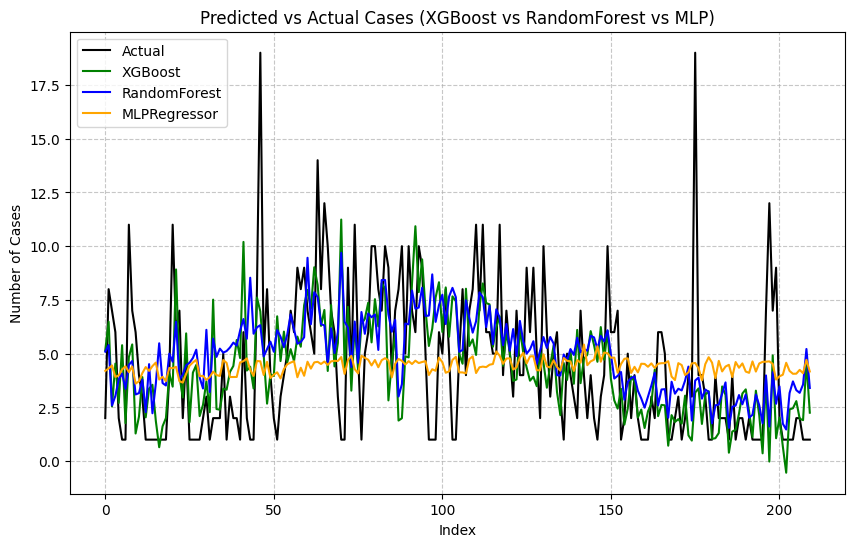

<Figure size 1000x600 with 0 Axes>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3620 (\N{THAI CHARACTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3641 (\N{THAI CHARACTER SARA UU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\

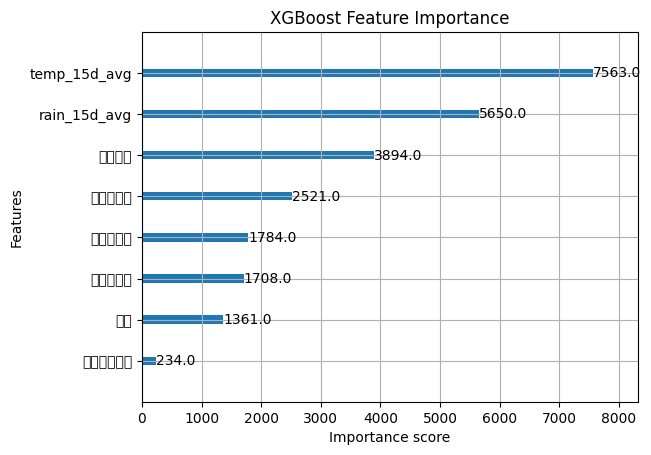

C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_4468\3096811674.py:101: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missi

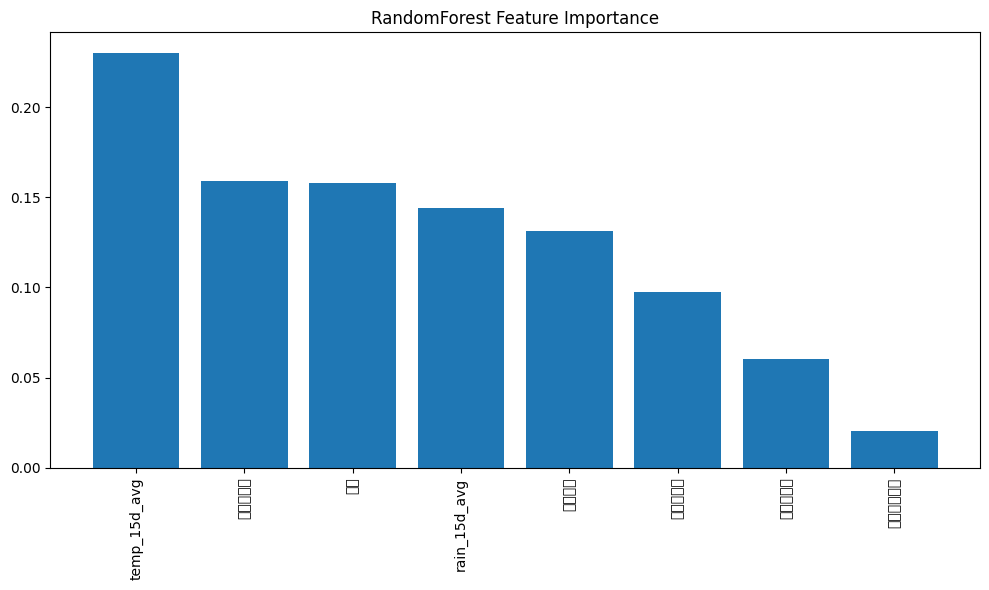

In [17]:
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
# -------------------------------
X_no_lag = df_final_clean_encoded.drop(columns=["cases","‡πÄ‡∏û‡∏®","‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)","‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™","humid_15d_avg"])
y_no_lag = df_final_clean["cases"]

# -------------------------------
# 2) Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_no_lag, y_no_lag, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {"Model": name, "RMSE": rmse, "R2": r2, "MAE": mae}, y_pred, model

# -------------------------------
# 3) XGBoost
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)
xgb_result, xgb_pred, xgb_model = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 4) RandomForest
# -------------------------------
rf_model = RandomForestRegressor(
    n_estimators=500, max_depth=12, random_state=42
)
rf_result, rf_pred, rf_model = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 5) Deep Learning (MLP)
# -------------------------------
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation="relu", solver="adam",
    learning_rate_init=0.001, max_iter=1000,
    random_state=42
)
mlp_result, mlp_pred, _ = evaluate_model("MLPRegressor", mlp_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 6) ‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
# -------------------------------
results_df = pd.DataFrame([xgb_result, rf_result, mlp_result])
print("\nüìä Performance Comparison:")
print(results_df)

# -------------------------------
# Visualization: Predicted vs Actual
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="black")
plt.plot(xgb_pred, label="XGBoost", color="green")
plt.plot(rf_pred, label="RandomForest", color="blue")
plt.plot(mlp_pred, label="MLPRegressor", color="orange")
plt.title("Predicted vs Actual Cases (XGBoost vs RandomForest vs MLP)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------------------
# 7) Feature Importance
# -------------------------------
# XGBoost Feature Importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type="weight", title="XGBoost Feature Importance")
plt.show()

# RandomForest Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("RandomForest Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X_no_lag.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
LSTM ‚Üí RMSE: 3.16, R¬≤: 0.143, MAE: 2.20
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
GRU ‚Üí RMSE: 3.15, R¬≤: 0.146, MAE: 2.26


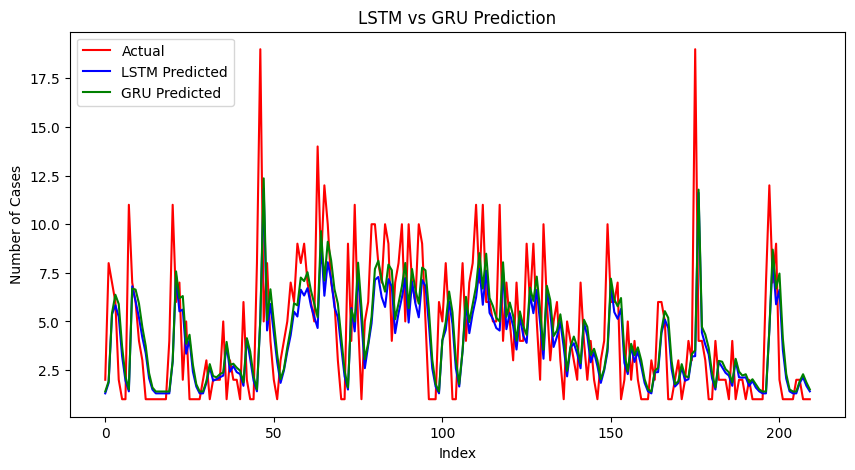

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• (Time Series)
# -------------------------------
df = df_final_clean.copy()   # ‡πÉ‡∏ä‡πâ dataset ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì
data = df["cases"].values.reshape(-1,1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î sequence length (‡πÉ‡∏ä‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á n ‡∏ß‡∏±‡∏ô/‡πÄ‡∏î‡∏∑‡∏≠‡∏ô)
time_steps = 3  

X, y = [], []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps])
    y.append(data_scaled[i+time_steps])
X, y = np.array(X), np.array(y)

# Train/Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -------------------------------
# 2) ‡∏™‡∏£‡πâ‡∏≤‡∏á Model LSTM
# -------------------------------
model_lstm = Sequential([
    LSTM(64, activation='tanh', input_shape=(time_steps,1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# -------------------------------
# 3) ‡∏™‡∏£‡πâ‡∏≤‡∏á Model GRU
# -------------------------------
model_gru = Sequential([
    GRU(64, activation='tanh', input_shape=(time_steps,1)),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')

# -------------------------------
# 4) Train
# -------------------------------
history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# -------------------------------
# 5) Evaluate
# -------------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred_inv = scaler.inverse_transform(y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    print(f"{name} ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return y_test_inv, y_pred_inv

y_true_lstm, y_pred_lstm = evaluate_model("LSTM", model_lstm, X_test, y_test)
y_true_gru, y_pred_gru = evaluate_model("GRU", model_gru, X_test, y_test)

# -------------------------------
# 6) Visualization
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_true_lstm, label="Actual", color="red")
plt.plot(y_pred_lstm, label="LSTM Predicted", color="blue")
plt.plot(y_pred_gru, label="GRU Predicted", color="green")
plt.title("LSTM vs GRU Prediction")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


In [21]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-a

‡∏≠‡∏±‡∏ô‡πÄ‡∏Å‡πà‡∏≤

üìä Comparison of Models (RMSE & MAE):
               Model  RMSE   MAE
0  Gradient Boosting  0.39  0.03
1            XGBoost  0.08  0.01
2      Random Forest  0.39  0.03
3      Deep Learning  0.13  0.10


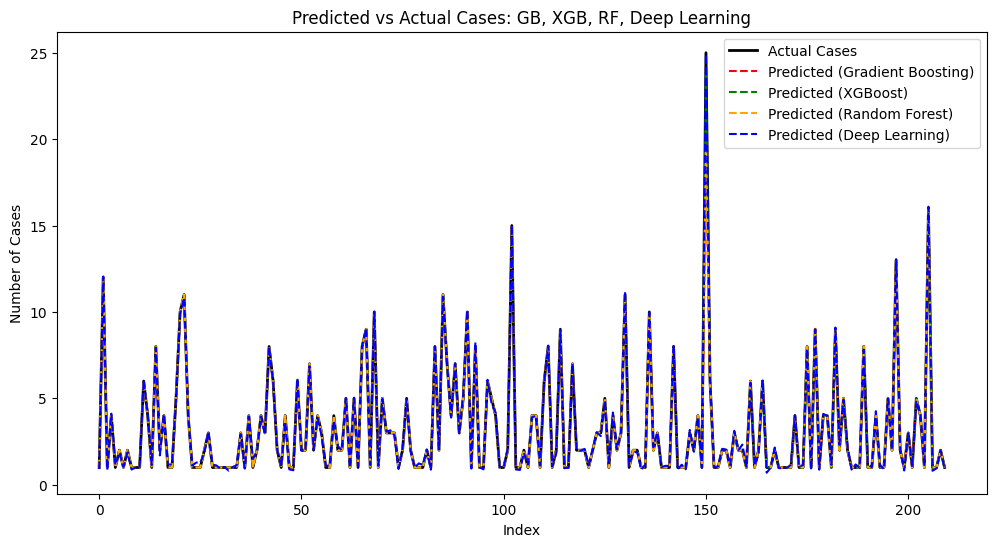

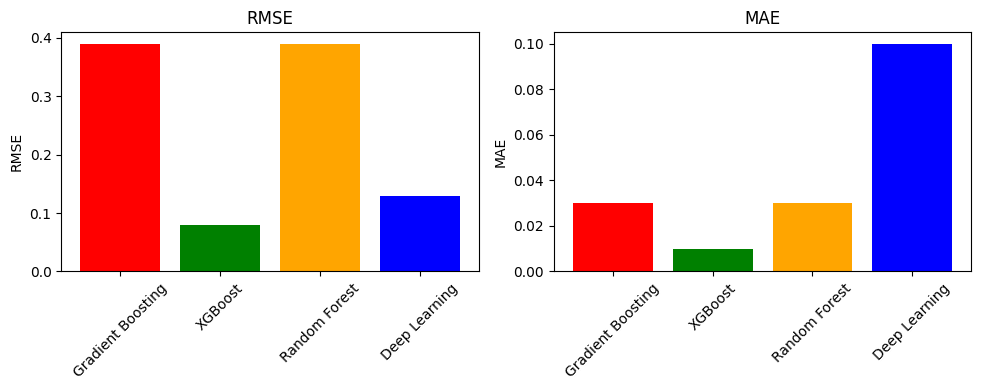

In [ ]:
# ==========================
# 0. Import Libraries
# ==========================
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==========================
# 1. ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y
# ==========================
X = df_final_clean_encoded.drop(columns=['‡πÄ‡∏û‡∏®','‡πÄ‡∏î‡∏∑‡∏≠‡∏ô','‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)','‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™','humid_15d_avg'])
y = df_final_clean['cases']

# ==========================
# 2. ‡πÅ‡∏ö‡πà‡∏á‡∏ä‡∏∏‡∏î train/test
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================
# 3. Standardize ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Deep Learning
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Gradient Boosting
# ==========================
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# ==========================
# 5. ‡πÇ‡∏°‡πÄ‡∏î‡∏• XGBoost
# ==========================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ==========================
# 6. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Random Forest
# ==========================
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ==========================
# 7. ‡πÇ‡∏°‡πÄ‡∏î‡∏• Deep Learning (MLP)
# ==========================
dl_model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam',
                        max_iter=500, random_state=42)
dl_model.fit(X_train_scaled, y_train)
y_pred_dl = dl_model.predict(X_test_scaled)

# ==========================
# 8. ‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏• RMSE & MAE
# ==========================
models = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Deep Learning']
preds = [y_pred_gb, y_pred_xgb, y_pred_rf, y_pred_dl]

metrics = []
for name, y_pred in zip(models, preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append({'Model': name, 'RMSE': round(rmse,2), 'MAE': round(mae,2)})

metrics_df = pd.DataFrame(metrics)
print("üìä Comparison of Models (RMSE & MAE):")
print(metrics_df)

# ==========================
# 9. ‡∏Å‡∏£‡∏≤‡∏ü Actual vs Predicted
# ==========================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Cases', color='black', linewidth=2)
plt.plot(y_pred_gb, label='Predicted (Gradient Boosting)', color='red', linestyle='--')
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='green', linestyle='--')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', color='orange', linestyle='--')
plt.plot(y_pred_dl, label='Predicted (Deep Learning)', color='blue', linestyle='--')
plt.title('Predicted vs Actual Cases: GB, XGB, RF, Deep Learning')
plt.xlabel('Index')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# ==========================
# 10. Bar chart RMSE & MAE
# ==========================
plt.figure(figsize=(10,4))
metrics_list = ['RMSE','MAE']
colors = ['red','green','orange','blue']

for i, metric in enumerate(metrics_list):
    plt.subplot(1,2,i+1)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=colors)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


üîπ XGBoost ‚Üí RMSE: 3.13, R¬≤: 0.159, MAE: 2.30
üîπ RandomForest ‚Üí RMSE: 3.05, R¬≤: 0.202, MAE: 2.27


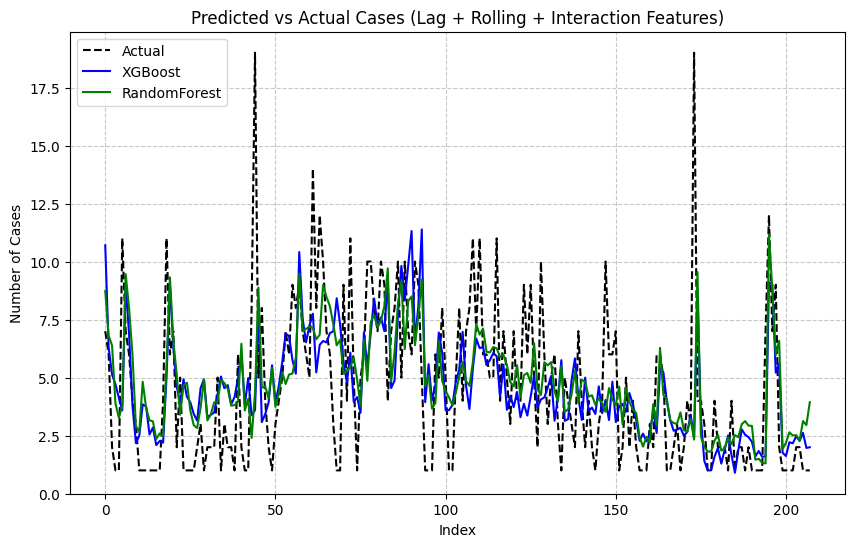

üìä XGBoost CV R¬≤: -0.075 (+/- 0.274)
üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [41]:
# -------------------------------
# üì¶ Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import TimeSeriesSplit, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------------
# üìÇ Load data
# -------------------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# -------------------------------
# ‚è≥ Feature Engineering
# -------------------------------
# lag features (‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á 1‚Äì12 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô)
for lag in range(1, 13):
    df[f"cases_lag{lag}"] = df["cases"].shift(lag)

# rolling mean ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Ñ‡∏™‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á 3,6,12 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
df["cases_roll3"] = df["cases"].shift(1).rolling(3).mean()
df["cases_roll6"] = df["cases"].shift(1).rolling(6).mean()
df["cases_roll12"] = df["cases"].shift(1).rolling(12).mean()

# seasonality features
df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

# interaction feature
df["temp_rain_interact"] = df["temp_15d_avg"] * df["rain_15d_avg"]

# ‡∏•‡∏ö NA ‡∏´‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á lag/rolling
df = df.dropna().reset_index(drop=True)

# -------------------------------
# üéØ Features & Target
# -------------------------------
selected_features = [
    "temp_15d_avg", "rain_15d_avg", "humid_15d_avg",
    "cases_lag1","cases_lag2","cases_lag3","cases_lag6","cases_lag12",
    "cases_roll3","cases_roll6","cases_roll12",
    "month_sin","month_cos","year",
    "temp_rain_interact"
]

X = df[selected_features]
y = df["cases"]

# -------------------------------
# üîÄ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------------
# üìä Evaluate Function
# -------------------------------
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return y_pred, model

# -------------------------------
# üöÄ Train Models
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=1500, learning_rate=0.01, max_depth=6,
    subsample=0.7, colsample_bytree=0.8,
    reg_lambda=2, reg_alpha=1,
    random_state=42, objective="reg:squarederror"
)
rf_model = RandomForestRegressor(
    n_estimators=1000, max_depth=15, random_state=42
)

y_pred_xgb, xgb_fitted = evaluate_model("XGBoost", xgb_model)
y_pred_rf, rf_fitted = evaluate_model("RandomForest", rf_model)

# -------------------------------
# üìà Plot results
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="black", linestyle="--")
plt.plot(y_pred_xgb, label="XGBoost", color="blue")
plt.plot(y_pred_rf, label="RandomForest", color="green")
plt.title("Predicted vs Actual Cases (Lag + Rolling + Interaction Features)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------------------
# üîç Cross Validation (XGBoost)
# -------------------------------
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(
    xgb_model, X, y, cv=tscv, scoring="r2"
)
print(f"üìä XGBoost CV R¬≤: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# -------------------------------
# üíæ Save Best Model (XGB)
# -------------------------------
joblib.dump(xgb_fitted, "xgb_regressor.pkl")
joblib.dump(selected_features, "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


üîπ XGBoost ‚Üí RMSE: 3.19, R¬≤: 0.126, MAE: 2.39
üîπ RandomForest ‚Üí RMSE: 3.16, R¬≤: 0.143, MAE: 2.38
üîπ MLPRegressor ‚Üí RMSE: 3.04, R¬≤: 0.210, MAE: 2.24


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step
üîπ LSTM ‚Üí RMSE: 3.03, R¬≤: 0.211, MAE: 2.29

üìä Performance Comparison:
          Model      RMSE        R2       MAE
0       XGBoost  3.192104  0.126015  2.386749
1  RandomForest  3.161647  0.142614  2.384627
2  MLPRegressor  3.035190  0.209829  2.240281
3          LSTM  3.032895  0.211023  2.286509


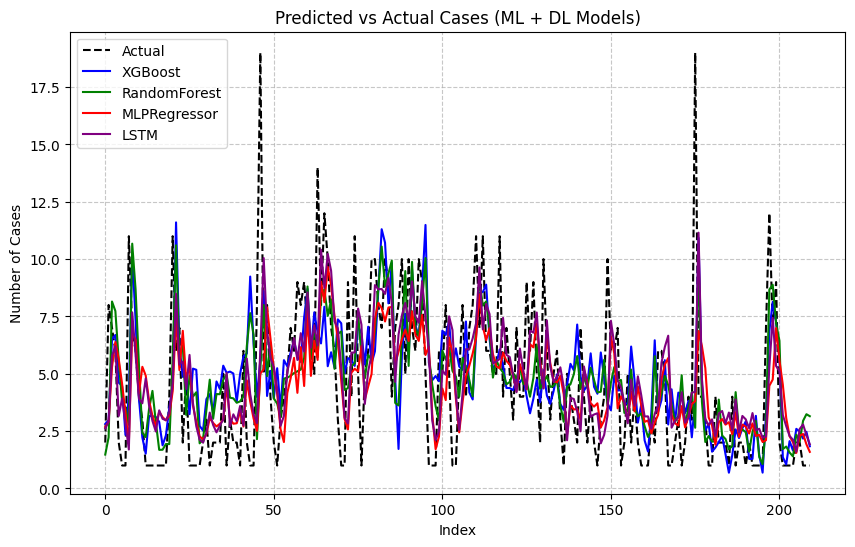

üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [53]:
# train_model.py
# -------------------------------
# üì¶ Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -------------------------------
# üìÇ Load Data
# -------------------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# -------------------------------
# üîÑ Encode Categorical
# -------------------------------
categorical_cols = ["‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# -------------------------------
# ‚è≥ Feature Engineering
# -------------------------------
# lag features (‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á 1‚Äì3 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô)
for lag in range(1, 4):
    df[f"cases_lag{lag}"] = df["cases"].shift(lag)

# rolling mean ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Ñ‡∏™‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á 3 ‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
df["cases_roll3"] = df["cases"].shift(1).rolling(3).mean()

# seasonality features
df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
df["month_cos"] = np.cos(2*np.pi*df["month"]/12)

# drop NA
df = df.dropna().reset_index(drop=True)

# -------------------------------
# üéØ Features & Target
# -------------------------------
selected_features = [
    "‡∏õ‡∏µ",
    "temp_15d_avg", "rain_15d_avg",
    "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•",
    "cases_lag1","cases_lag2","cases_lag3",
    "cases_roll3",
    "month_sin","month_cos"
]

X = df[selected_features]
y = df["cases"]

# -------------------------------
# üîÄ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# üìä Evaluate Function
# -------------------------------
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {"Model": name, "RMSE": rmse, "R2": r2, "MAE": mae}, y_pred, model

# -------------------------------
# üöÄ Train ML Models
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=1000, learning_rate=0.03, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, reg_lambda=1,
    random_state=42, objective="reg:squarederror"
)
rf_model = RandomForestRegressor(
    n_estimators=1000, max_depth=12, random_state=42
)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32), activation="relu",
    solver="adam", max_iter=500, random_state=42
)

res_xgb, y_pred_xgb, xgb_fitted = evaluate_model("XGBoost", xgb_model)
res_rf, y_pred_rf, rf_fitted = evaluate_model("RandomForest", rf_model)
res_mlp, y_pred_mlp, mlp_fitted = evaluate_model("MLPRegressor", mlp_model)

# -------------------------------
# ü§ñ LSTM (Deep Learning)
# -------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# reshape ‚Üí [samples, timesteps, features]
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_train_lstm, X_test_lstm = train_test_split(
    X_lstm, test_size=0.2, shuffle=False, random_state=42
)
y_train_lstm, y_test_lstm = train_test_split(
    y, test_size=0.2, shuffle=False, random_state=42
)

model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, verbose=0)

y_pred_lstm = model_lstm.predict(X_test_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
print(f"üîπ LSTM ‚Üí RMSE: {rmse_lstm:.2f}, R¬≤: {r2_lstm:.3f}, MAE: {mae_lstm:.2f}")

# -------------------------------
# üìä Compare All
# -------------------------------
results_df = pd.DataFrame([
    res_xgb,
    res_rf,
    res_mlp,
    {"Model": "LSTM", "RMSE": rmse_lstm, "R2": r2_lstm, "MAE": mae_lstm}
])
print("\nüìä Performance Comparison:")
print(results_df)

# -------------------------------
# üìà Plot Results
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="black", linestyle="--")
plt.plot(y_pred_xgb, label="XGBoost", color="blue")
plt.plot(y_pred_rf, label="RandomForest", color="green")
plt.plot(y_pred_mlp, label="MLPRegressor", color="red")
plt.plot(y_pred_lstm, label="LSTM", color="purple")
plt.title("Predicted vs Actual Cases (ML + DL Models)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# -------------------------------
# üíæ Save Best Model (XGB + Features)
# -------------------------------
joblib.dump(xgb_fitted, "xgb_regressor.pkl")
joblib.dump(selected_features, "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


In [57]:
# train_model.py
# -------------------------------
# üì¶ Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# -------------------------------
# üìÇ Load Data
# -------------------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# -------------------------------
# ‚è≥ Feature Engineering (lag 1‚Äì3)
# -------------------------------
for lag in range(1, 4):
    df[f"cases_lag{lag}"] = df["cases"].shift(lag)

df = df.dropna().reset_index(drop=True)

# -------------------------------
# üéØ Features & Target
# -------------------------------
selected_features = [
    "temp_15d_avg", "rain_15d_avg",
    "cases_lag1", "cases_lag2", "cases_lag3"
]

X = df[selected_features]
y = df["cases"]

# -------------------------------
# üîÄ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# üöÄ Train XGBoost
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=800, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8, random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# -------------------------------
# üìä Evaluate
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"üîπ XGBoost ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")

# -------------------------------
# üíæ Save model + features
# -------------------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(selected_features, "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


üîπ XGBoost ‚Üí RMSE: 3.40, R¬≤: 0.011, MAE: 2.47
üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [64]:
# train_model.py
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# -------------------------------
# üìÇ Load Data
# -------------------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# -------------------------------
# ‚è≥ Feature Engineering (lag 1‚Äì3)
# -------------------------------
for lag in range(1, 4):
    df[f"cases_lag{lag}"] = df["cases"].shift(lag)

df = df.dropna().reset_index(drop=True)

# -------------------------------
# üéØ ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ï‡∏≤‡∏° correlation
# -------------------------------
corr = df.corr(numeric_only=True)["cases"].abs().sort_values(ascending=False)
print("üìä Correlation with cases:\n", corr)

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å top 7 ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå (‡∏¢‡∏Å‡πÄ‡∏ß‡πâ‡∏ô target ‡πÄ‡∏≠‡∏á)
top_features = corr.drop("cases").head(7).index.tolist()
print("‚úÖ Selected features:", top_features)

# -------------------------------
# üî° Encoding categorical
# -------------------------------
df_encoded = df.copy()
cat_features = [col for col in top_features if df_encoded[col].dtype == "object"]

for col in cat_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

X = df_encoded[top_features]
y = df_encoded["cases"]

# -------------------------------
# üîÄ Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# üöÄ Train XGBoost
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# -------------------------------
# üìä Evaluate
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"üîπ XGBoost ‚Üí RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")

# -------------------------------
# üíæ Save model + features
# -------------------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(top_features, "xgb_features.pkl")
print("üíæ Saved: xgb_regressor.pkl + xgb_features.pkl")


üìä Correlation with cases:
 cases            1.000000
cases_lag1       0.573559
cases_lag2       0.423437
cases_lag3       0.308246
‡∏õ‡∏µ               0.226934
year             0.226934
temp_15d_avg     0.099039
rain_15d_avg     0.093032
‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)         0.034282
humid_15d_avg    0.017900
‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™           0.011275
‡πÄ‡∏î‡∏∑‡∏≠‡∏ô            0.008118
month            0.008118
Name: cases, dtype: float64
‚úÖ Selected features: ['cases_lag1', 'cases_lag2', 'cases_lag3', '‡∏õ‡∏µ', 'year', 'temp_15d_avg', 'rain_15d_avg']
üîπ XGBoost ‚Üí RMSE: 3.24, R¬≤: 0.102, MAE: 2.41
üíæ Saved: xgb_regressor.pkl + xgb_features.pkl


In [73]:
pip install jinja2


üîπ XGBoost RMSE: 3.12, R¬≤: 0.167, MAE: 2.33
üîπ RandomForest RMSE: 2.97, R¬≤: 0.245, MAE: 2.24
üîπ Deep Learning RMSE: 3.06, R¬≤: 0.198, MAE: 2.32

üìä Performance Comparison:
           Model      RMSE        R2       MAE
0        XGBoost  3.116279  0.167044  2.330670
1   RandomForest  2.966994  0.244937  2.243819
2  Deep Learning  3.057424  0.198209  2.320110


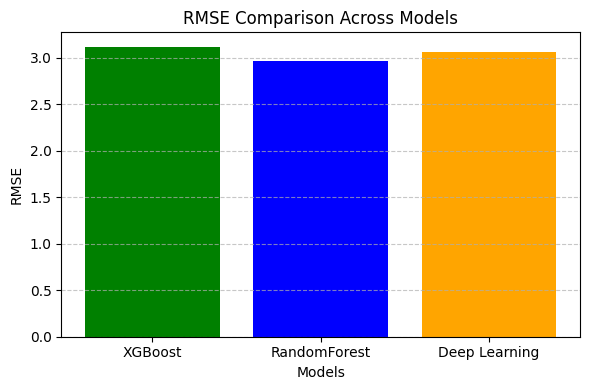

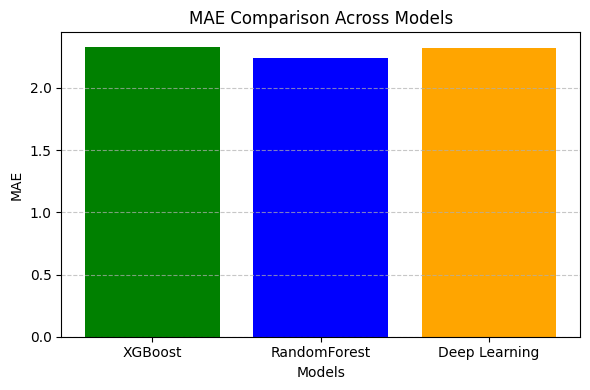

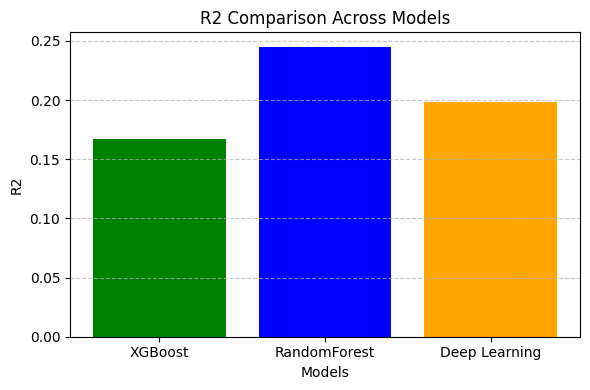

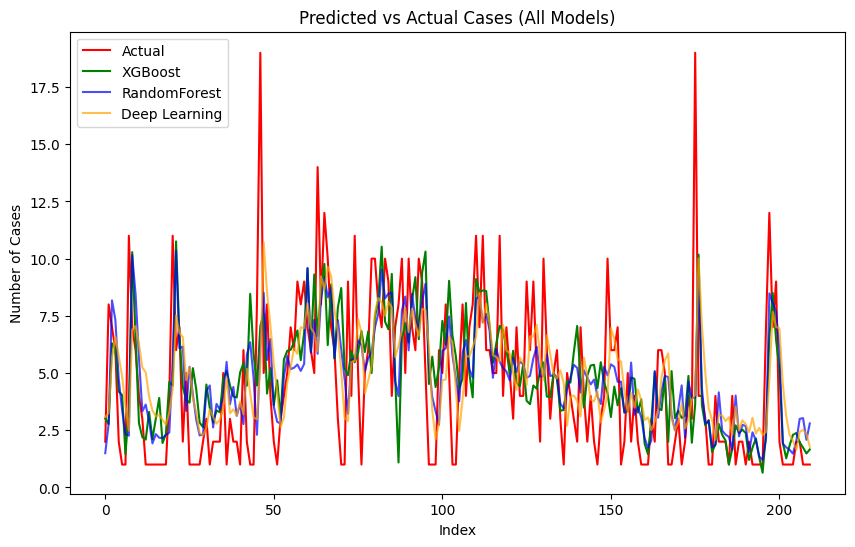

In [76]:

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1) ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• + lag features
# -------------------------------
df_with_lag = df_final_clean_encoded.copy()
df_with_lag["cases_lag1"] = df_final_clean["cases"].shift(1)
df_with_lag["cases_lag2"] = df_final_clean["cases"].shift(2)
df_with_lag["cases_lag3"] = df_final_clean["cases"].shift(3)
df_with_lag = df_with_lag.dropna().reset_index(drop=True)

X = df_with_lag.drop(columns=["cases","‡πÄ‡∏û‡∏®","‡∏≠‡∏≤‡∏¢‡∏∏(‡∏õ‡∏µ)","‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™","humid_15d_avg"])
y = df_with_lag["cases"]

# -------------------------------
# 2) Train/Test Split (time series)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

# -------------------------------
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏ú‡∏•
# -------------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"üîπ {name} RMSE: {rmse:.2f}, R¬≤: {r2:.3f}, MAE: {mae:.2f}")
    return {
        "Model": name,
        "RMSE": rmse,
        "R2": r2,
        "MAE": mae
    }, y_pred

# -------------------------------
# 3) Train + Evaluate Models
# -------------------------------
xgb_model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42
)
xgb_result, xgb_pred = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf_result, rf_pred = evaluate_model("RandomForest", rf_model, X_train, X_test, y_train, y_test)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)
mlp_result, mlp_pred = evaluate_model("Deep Learning", mlp_model, X_train, X_test, y_train, y_test)

# -------------------------------
# 4) ‡∏£‡∏ß‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á
# -------------------------------
results_df = pd.DataFrame([xgb_result, rf_result, mlp_result])
print("\nüìä Performance Comparison:")
print(results_df)

# -------------------------------
# 5) ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö (Metric)
# -------------------------------
metrics = ["RMSE", "MAE", "R2"]
for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(results_df["Model"], results_df[metric], color=["green","blue","orange"])
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6) ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü Predicted vs Actual
# -------------------------------
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual", color="red")
plt.plot(xgb_pred, label="XGBoost", color="green")
plt.plot(rf_pred, label="RandomForest", color="blue", alpha=0.7)
plt.plot(mlp_pred, label="Deep Learning", color="orange", alpha=0.7)
plt.title("Predicted vs Actual Cases (All Models)")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib
import numpy as np

# -------------------
# Load Data
# -------------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# ------------------- Generate Lag Features -------------------
df = df.sort_values("date").reset_index(drop=True)
for k in [1, 2, 3]:
    df[f"cases_lag{k}"] = df["cases"].shift(k)

df = df.dropna().reset_index(drop=True)

# ------------------- Features -------------------
features = [
    "temp_15d_avg", "rain_15d_avg",
    "year", "month",
    "cases_lag1", "cases_lag2", "cases_lag3",
    "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"
]

X = df[features]
y = df["cases"]

# ------------------- One-hot encode categorical -------------------
cat_cols = ["‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = enc.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=enc.get_feature_names_out(cat_cols))

X_num = X.drop(columns=cat_cols).reset_index(drop=True)
X_final = pd.concat([X_num, X_cat_df], axis=1)

# ------------------- Train/Test split -------------------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# ------------------- Train XGBoost -------------------
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)

# ------------------- Evaluate -------------------
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("üìä Model Performance:")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.3f}")

# ------------------- Save model + features + encoder -------------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(list(X_final.columns), "xgb_features.pkl")
joblib.dump(enc, "xgb_encoder.pkl")

print("‚úÖ Model trained & saved with categorical encoding + lag features")


üìä Model Performance:
RMSE: 2.54, MAE: 1.70, R¬≤: 0.393
‚úÖ Model trained & saved with categorical encoding + lag features


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib
import numpy as np

# ---------------- Load Data ----------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# ---------------- Generate Lag Features ----------------
df = df.sort_values("date").reset_index(drop=True)
for k in [1, 2, 3]:
    df[f"cases_lag{k}"] = df["cases"].shift(k)

df = df.dropna().reset_index(drop=True)

# ---------------- Features ----------------
features = [
    "temp_15d_avg", "rain_15d_avg",
    "year", "month",
    "cases_lag1", "cases_lag2", "cases_lag3",
    "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"
]

X = df[features]
y = df["cases"]

# ---------------- One-hot Encode ----------------
cat_cols = ["‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = enc.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=enc.get_feature_names_out(cat_cols))

X_num = X.drop(columns=cat_cols).reset_index(drop=True)
X_final = pd.concat([X_num, X_cat_df], axis=1)

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# ---------------- Train XGBoost ----------------
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)

# ---------------- Evaluate ----------------
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("üìä Model Performance:")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.3f}")

# ---------------- Save Model ----------------
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(list(X_final.columns), "xgb_features.pkl")
joblib.dump(enc, "xgb_encoder.pkl")

print("‚úÖ Model trained & saved with categorical encoding + lag features")


üìä Model Performance:
RMSE: 2.54, MAE: 1.70, R¬≤: 0.393
‚úÖ Model trained & saved with categorical encoding + lag features


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import joblib
import numpy as np

# ---------------- Load Data ----------------
df = pd.read_excel("df_final_clean.xlsx")
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# ---------------- Generate Lag Features ----------------
df = df.sort_values("date").reset_index(drop=True)
for k in [1, 2, 3]:
    df[f"cases_lag{k}"] = df["cases"].shift(k)

df = df.dropna().reset_index(drop=True)

# ---------------- Features ----------------
features = [
    "temp_15d_avg", "rain_15d_avg",
    "year", "month",
    "cases_lag1", "cases_lag2", "cases_lag3",
    "‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"
]

X = df[features]
y = df["cases"]

# ---------------- One-hot Encode ----------------
cat_cols = ["‡∏ï‡∏≥‡∏ö‡∏•", "‡∏≠‡∏≥‡πÄ‡∏†‡∏≠", "‡∏≠‡∏≤‡∏ä‡∏µ‡∏û", "‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = enc.fit_transform(X[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=enc.get_feature_names_out(cat_cols))

X_num = X.drop(columns=cat_cols).reset_index(drop=True)
X_final = pd.concat([X_num, X_cat_df], axis=1)

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# ======================= Train Models =======================
# 1. XGBoost
xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestRegressor(
    n_estimators=300, max_depth=10, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Deep Learning (MLPRegressor)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32), activation="relu",
    solver="adam", max_iter=500, random_state=42
)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# ======================= Evaluate =======================
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìä {name} Performance:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.3f}")
    return rmse, mae, r2

eval_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb)
eval_rf = evaluate_model("Random Forest", y_test, y_pred_rf)
eval_mlp = evaluate_model("Deep Learning (MLP)", y_test, y_pred_mlp)

# ======================= Save Models =======================
joblib.dump(xgb_model, "xgb_regressor.pkl")
joblib.dump(rf_model, "rf_regressor.pkl")
joblib.dump(mlp_model, "mlp_regressor.pkl")
joblib.dump(list(X_final.columns), "xgb_features.pkl")
joblib.dump(enc, "xgb_encoder.pkl")

print("\n‚úÖ All models trained & saved successfully!")



üìä XGBoost Performance:
RMSE: 2.54, MAE: 1.70, R¬≤: 0.393

üìä Random Forest Performance:
RMSE: 2.52, MAE: 1.70, R¬≤: 0.402

üìä Deep Learning (MLP) Performance:
RMSE: 2.70, MAE: 1.67, R¬≤: 0.313

‚úÖ All models trained & saved successfully!


In [80]:
import joblib
expected_features = joblib.load("xgb_features.pkl")
print(expected_features)


['temp_15d_avg', 'rain_15d_avg', '‡∏≠‡∏≤‡∏ä‡∏µ‡∏û', '‡∏ï‡∏≥‡∏ö‡∏•', '‡∏≠‡∏≥‡πÄ‡∏†‡∏≠', '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô', '‡∏õ‡∏µ', '‡∏§‡∏î‡∏π‡∏Å‡∏≤‡∏•', 'cases_lag1', 'cases_lag2', 'cases_lag3']
